# Time Series - AR, MA, ARMA, ARIMA

### What does `statsmodels` include?

"statsmodels" is a comprehensive Python package for statistical modeling and econometrics, offering features such as:

+ Linear regression, generalized linear models (GLM), and Bayesian regression

+ Time series models: AR, MA, ARIMA, SARIMA, SARIMAX, VAR, ARCH, GARCH

+ Descriptive statistics and statistical hypothesis testing

+ Tools for autocorrelation analysis: ACF, PACF, and stationarity tests like the Dickey-Fuller test




### Main Differences: `statsmodels` vs `scikit-learn` in Linear Regression

| Feature               | statsmodels                                                  | scikit-learn                          |
|:----------------------|:-------------------------------------------------------------|:---------------------------------------|
| 🎯 Purpose            | Statistical analysis, inference, interpretation              | Machine learning, prediction           |
| 🧾 Output             | Detailed stats (p-value, adjusted R², SE, CI, t, F)           | Only prediction result and R²          |
| 🔍 Model              | Classical statistics (OLS, GLM, etc.)                        | Purely algorithmic                     |
| 🧠 Bayesian Regression | Available (e.g., `BayesMixedGLM`)                           | Not built-in                           |
| 📊 Statistical Tests  | Yes: t-test, F-test, AIC, BIC, p-values                       | No (must be added manually)            |
| 💡 Explainability     | Strong (p-values, confidence intervals, diagnostics)          | Weaker (no p-values, SE, etc.)         |


### Import the libraries:

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

### **AR(p)** models:

### **Example 1:** $X_t = 0.3X_{t-1} + 0.2X_{t-2} - 0.6 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.


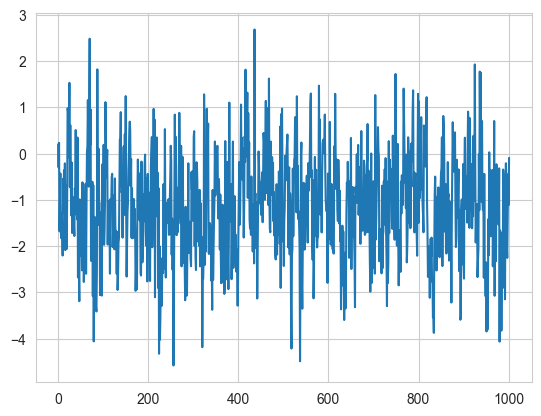

<Figure size 1000x600 with 0 Axes>

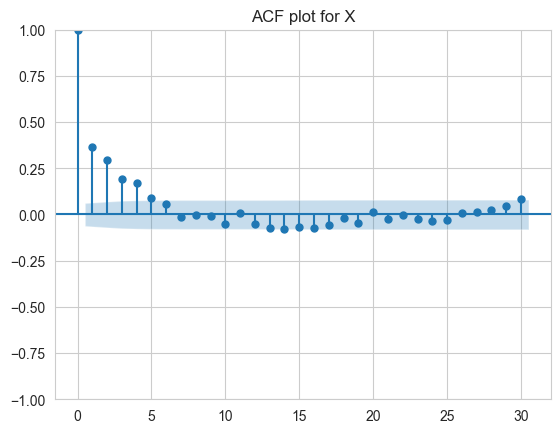

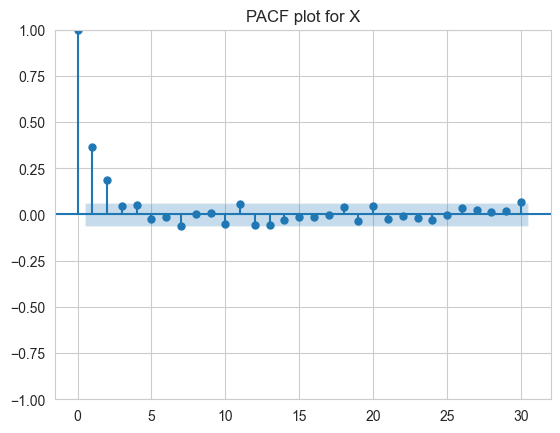

In [28]:
X = [0.2, -0.3]
for i in range(1000):
    X.append(0.3 * X[-1] + 0.2 * X[-2] - 0.6 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=30, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [29]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=2)  # model AR(2)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

forecast_ar = model_ar_fit.predict(start=len(data), end=len(data)+4)  # prediction
print(forecast_ar)

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(2)   Log Likelihood               -1449.234
Method:               Conditional MLE   S.D. of innovations              1.031
Date:                Sat, 21 Jun 2025   AIC                           2906.469
Time:                        00:13:37   BIC                           2926.100
Sample:                             2   HQIC                          2913.930
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5840      0.051    -11.390      0.000      -0.685      -0.484
y.L1           0.2987      0.031      9.608      0.000       0.238       0.360
y.L2           0.1861      0.031      5.991      0.0

### Conclusions:

The model coefficients are **statistically significant**, since their **𝑝-values < 0.05**, which means we do not reject the null hypothesis - we conclude that both lags `L1` and `L2` have a meaningful impact on the dependent variable.

Regarding **oscillations**, there are **no complex** roots in the characteristic equation, so we do not observe any cyclic or oscillatory behavior in the process.

The model also satisfies the **condition of stationarity** (i.e., stability) because both roots have **moduli greater than 1** (1.68 and 3.38), which ensures the process does not explode over time and that its statistical properties remain constant.

### Now we substitute an incorrect value from the PACF plot -> 3:

In [30]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=3)  # model AR(3)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(3)   Log Likelihood               -1446.932
Method:               Conditional MLE   S.D. of innovations              1.030
Date:                Sat, 21 Jun 2025   AIC                           2903.863
Time:                        00:13:37   BIC                           2928.397
Sample:                             3   HQIC                          2913.188
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5601      0.054    -10.279      0.000      -0.667      -0.453
y.L1           0.2901      0.032      9.178      0.000       0.228       0.352
y.L2           0.1719      0.032      5.295      0.0

### Conclusions:

The new model coefficient is **not statistically significant**, their **𝑝-values > 0.05**, which means we do reject the null hypothesis - we conclude that lags `L3` have not a meaningful impact on the dependent variable.

### **Example 2:** $X_t = -0.6X_{t-1} + 0.2X_{t-4} + 0.1 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

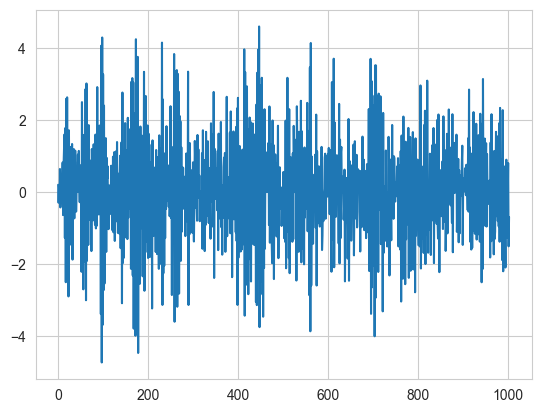

<Figure size 1000x600 with 0 Axes>

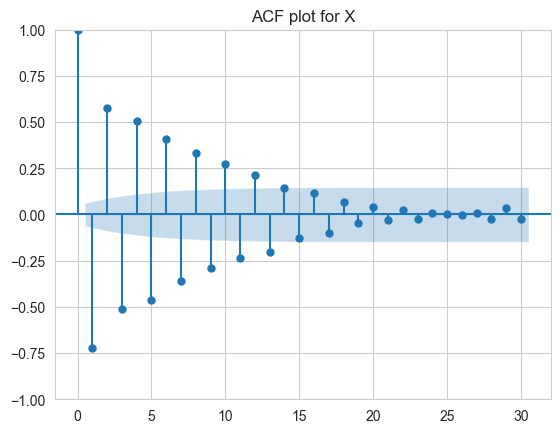

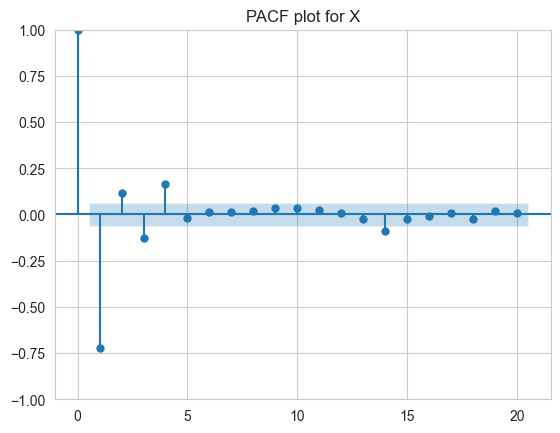

In [31]:
X = [0.2, -0.3, 0.1, -0.2]
for i in range(1000):
    X.append(-0.6 * X[-1] + 0.2 * X[-4] + 0.1 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [32]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=4)  # model AR(4)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1004
Model:                     AutoReg(4)   Log Likelihood               -1437.835
Method:               Conditional MLE   S.D. of innovations              1.019
Date:                Sat, 21 Jun 2025   AIC                           2887.670
Time:                        00:13:38   BIC                           2917.116
Sample:                             4   HQIC                          2898.862
                                 1004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0591      0.032      1.822      0.068      -0.004       0.123
y.L1          -0.6007      0.031    -19.227      0.000      -0.662      -0.539
y.L2           0.0305      0.037      0.833      0.4

### Conclusions:

In this model, the coefficients for lags `L2` and `L3` are not statistically significant, since their p-values > 0.05, which means we fail to reject the null hypothesis — we conclude that these lags do not have a meaningful impact on the dependent variable. On the other hand, the constant, lag `L1`, and lag `L4` are statistically significant (p-values < 0.05), indicating that they do contribute significantly to explaining the variation in the dependent variable.

### **MA(q)** models:

### $X_t = 0.4 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

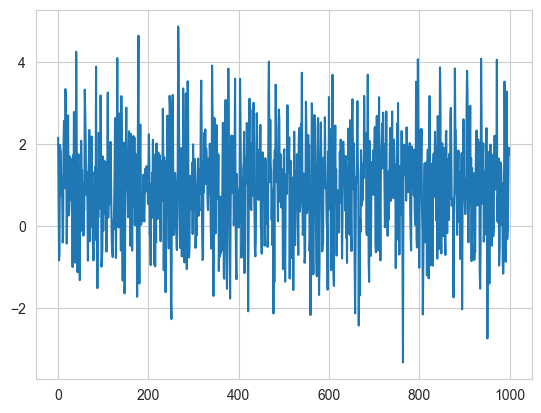

<Figure size 1000x600 with 0 Axes>

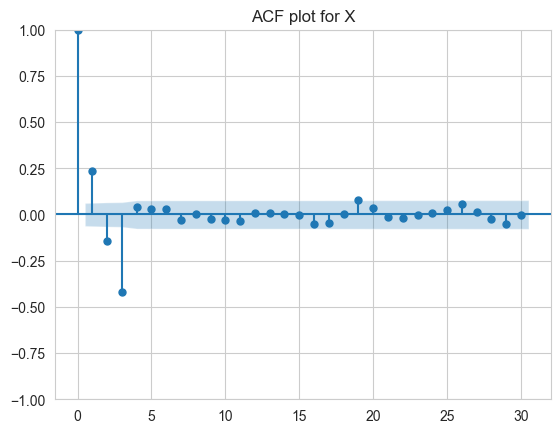

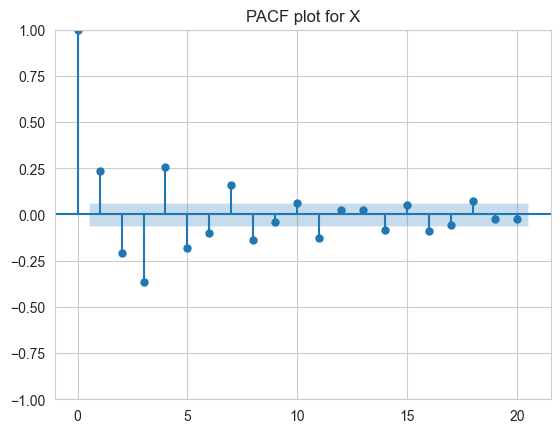

In [33]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.Series(X)


model_ma = ARIMA(data, order=(0, 0, 3)) # model ARIMA(p,d,q)
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1413.797
Date:                Sat, 21 Jun 2025   AIC                           2837.594
Time:                        00:13:39   BIC                           2862.133
Sample:                             0   HQIC                          2846.920
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9443      0.026     36.740      0.000       0.894       0.995
ma.L1          0.3966      0.026     15.319      0.000       0.346       0.447
ma.L2          0.0366      0.029      1.258      0.2

### Conclusions:

As with the construction of an AR model, in the MA (Moving Average) model, an additional parameter called `sigma2` appears, which represents the variance of the error term; it measures the unexplained randomness in the model, and the smaller the value of `sigma2`, the better the model fit.

### **ARMA(p,q)** models:

### $X_t = 0.4 X_{t-1} + 0.5 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

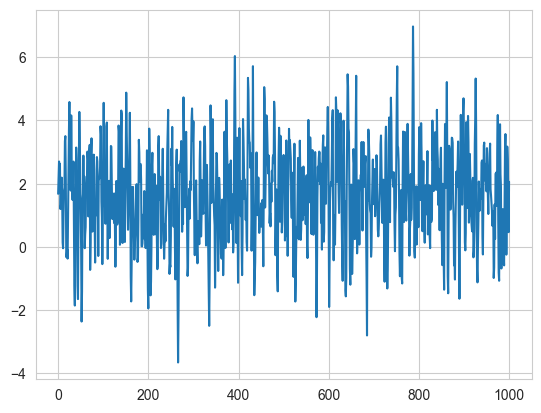

<Figure size 1000x600 with 0 Axes>

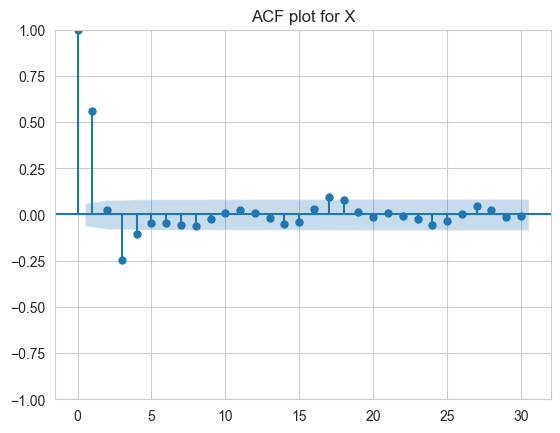

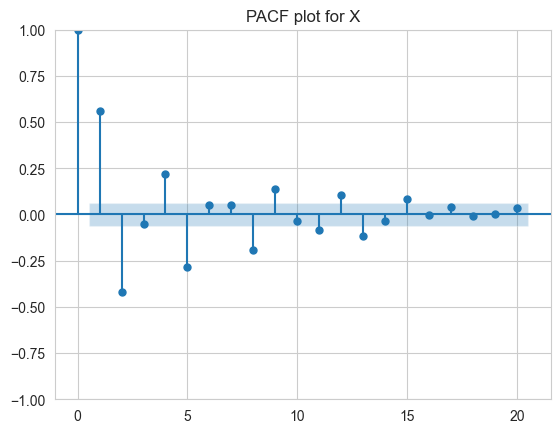

In [35]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = [1.68]

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * X[-1] + 0.5 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [36]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 3)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1419.062
Date:                Sat, 21 Jun 2025   AIC                           2850.124
Time:                        00:13:40   BIC                           2879.577
Sample:                             0   HQIC                          2861.317
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6599      0.050     33.077      0.000       1.562       1.758
ar.L1          0.4849      0.082      5.910      0.000       0.324       0.646
ma.L1          0.4499      0.071      6.353      0.0

In [37]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 4)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1418.459
Date:                Sat, 21 Jun 2025   AIC                           2850.917
Time:                        00:13:41   BIC                           2885.279
Sample:                             0   HQIC                          2863.976
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6598      0.048     34.539      0.000       1.566       1.754
ar.L1          0.6303      0.143      4.420      0.000       0.351       0.910
ma.L1          0.2952      0.147      2.005      0.0

In [38]:
model = ARIMA(data, order=(1, 0, 3))
model_fit = model.fit()

forecast_object = model_fit.get_forecast(steps=5)   # Forecasting

forecast = forecast_object.predicted_mean   # Expected Value (Mean)
conf_int = forecast_object.conf_int(alpha=0.05)     # Confidence Interval Values

print("Forecasted values:\n", forecast)
print("\nConfidence intervals:\n", conf_int)

Forecasted values:
 1001    1.904234
1002    2.620154
1003    1.352172
1004    1.510659
1005    1.587513
Name: predicted_mean, dtype: float64

Confidence intervals:
        lower y   upper y
1001 -0.050745  3.859213
1002 -0.056078  5.296387
1003 -1.451041  4.155385
1004 -1.398599  4.419916
1005 -1.346125  4.521150


### Conclusions:

Due to oscillations in the values on the plots, it is advisable to build several models and choose the best one.

### **ARIMA(p,d,q)** models:

### $X_t = 0.01t + 0.4 X_{t-3} + \epsilon_t$

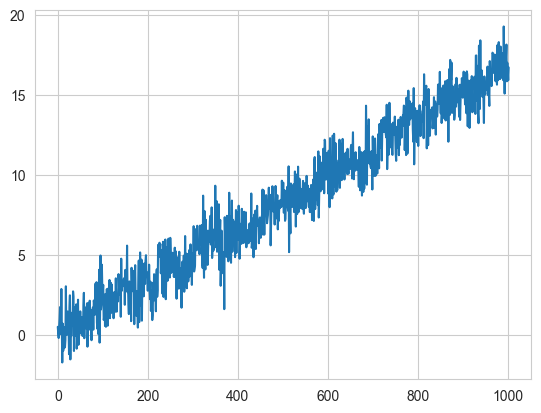

<Figure size 1000x600 with 0 Axes>

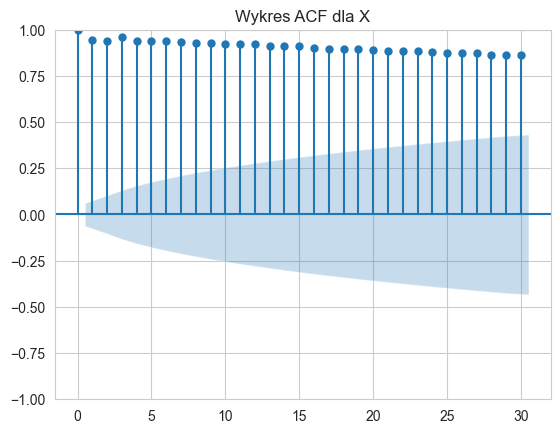

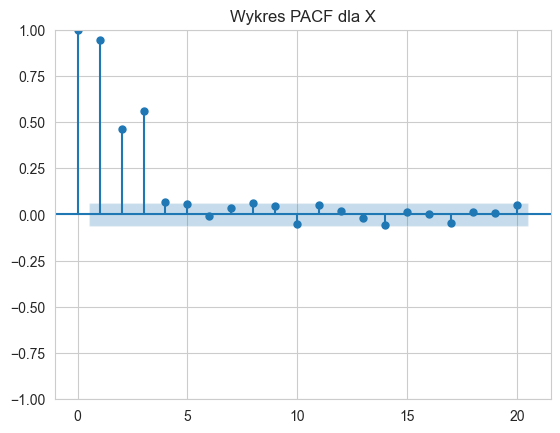

In [39]:
X = [0.5, 0.1, -0.2]
eps = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.01 * (i + 1) + 0.4 * X[-3] + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('Wykres ACF dla X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('Wykres PACF dla X')
plt.show()

### Transforming it into a stationary form!
Our time series does not meet the conditions of stationarity, so we need to transform it into a stationary form:

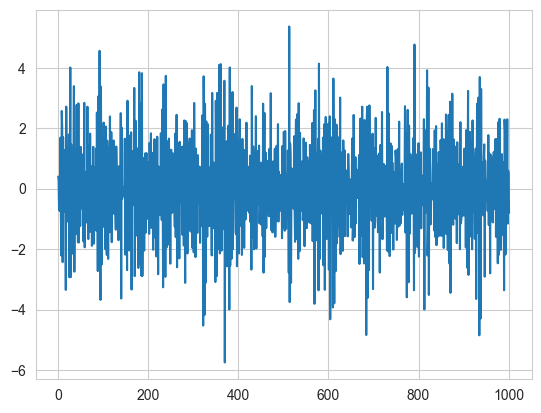

In [40]:
Y = np.array(X[:-1]) - np.array(X[1:])
plt.plot(Y)
plt.show()


### Let's verify mathematically whether the time series X and Y are stationary:

We use ADF (Augmented Dickey-Fuller) tests, which are designed to assess the stationarity of a time series.

It tests the following hypotheses:

+ H₀ (null hypothesis): the series is not stationary (contains a unit root, i.e., has a trend).

+ H₁ (alternative hypothesis): the series is stationary.

By analyzing the test statistic and the corresponding p-value, we can determine whether to reject the null hypothesis and conclude that the series is stationary.

In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.27625355058618073
p-value: 0.9288008554303131


$p-value > alfa = 0.05$

We accept the null hypothesis $H_{0}$ - The series is not stationary

In [42]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.556088831909921
p-value: 7.945697032625329e-19


$p-value < alfa = 0.05$

We reject the null hypothesis $H_{0}$ - The series is stationary

## Real data example:

This is a meteorological dataset collected from a single weather station, containing 60 daily measurements. It includes parameters such as minimum, maximum, and average temperature, wind speed, and precipitation levels. The data can be used for climate analysis, weather forecasting, and time series modeling of atmospheric phenomena.

Link: https://rafalraczynski.com.pl/imgw-archiwum/

         data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
0  2024-07-01     14.5     19.3    16.9         1.0        18.1        9.6   
1  2024-07-02     18.7     25.0    21.8         1.8        25.8       13.8   
2  2024-07-03     19.2     23.6    21.4         0.4        20.7       10.5   
3  2024-07-04     12.1     19.6    15.8         1.5        25.0       13.2   
4  2024-07-05     15.8     22.3    19.0         2.2        15.4        8.8   

   opad[mm]  
0       7.2  
1       9.7  
2       6.6  
3       0.0  
4       9.7  
          data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
56  2024-08-26     18.4     26.0    22.2         2.0        29.4       15.7   
57  2024-08-27     19.1     27.0    23.0         0.0        20.1       10.0   
58  2024-08-28     21.7     26.7    24.2         1.4        27.0       14.2   
59  2024-08-29     18.8     25.1    22.0         2.3        27.0       14.6   
60  2024-08-30     12.9     20.1    16.5         1.5

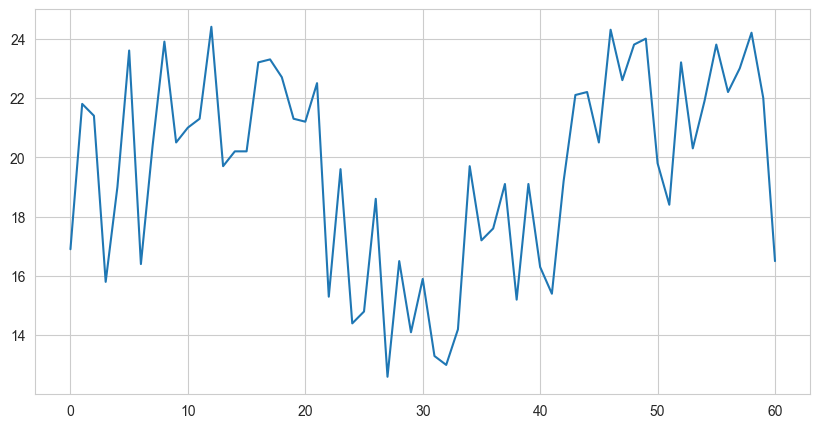

In [43]:
df = pd.read_csv("meteorological/krk.txt", sep=r"\s+")

print(df.head())
print(df.tail())

# Our goal is the column of average temperature
X = df["Tsr[C]"]

# Plot of temperature
fig = plt.figure(figsize=(10, 5))
X.plot()
plt.show()

### Let's verify mathematically whether the time series X is stationary:

In [44]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('alfa value: 5% -> 0.05')

ADF Statistic: -2.732505617938323
p-value: 0.06858029368400918
alfa value: 5% -> 0.05


$p-value > alfa = 0.05$

We accept the null hypothesis $H_{0}$ - The series is not stationary

### Transforming it into a stationary form!
Our time series does not meet the conditions of stationarity, so we need to transform it into a stationary form. Since we are using an ARIMA model, we have to keep track of every attempt to make the series stationary:



In [45]:
Y = X.diff().dropna()

In [46]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('alfa value: 5% -> 0.05')

ADF Statistic: -9.596316608479457
p-value: 1.9740017051445005e-16
alfa value: 5% -> 0.05


$p-value < alfa = 0.05$

We reject the null hypothesis $H_{0}$ - The series is stationary

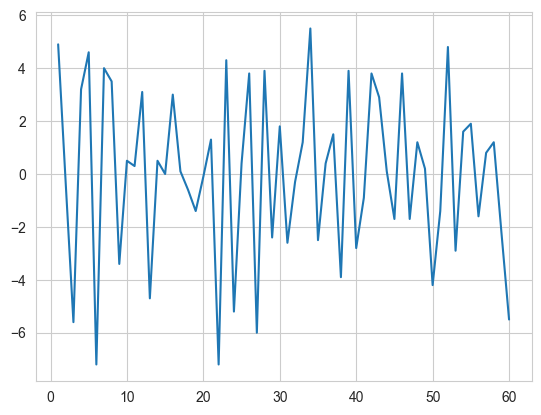

<Figure size 1000x600 with 0 Axes>

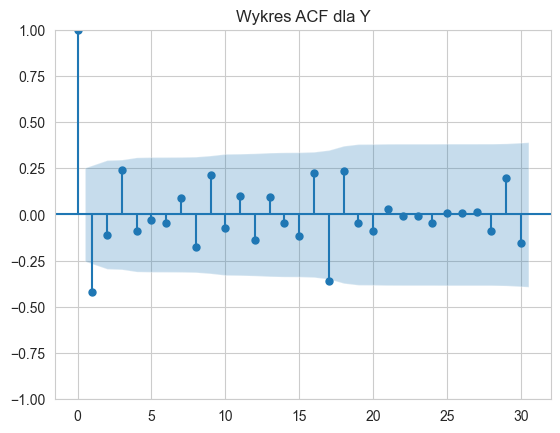

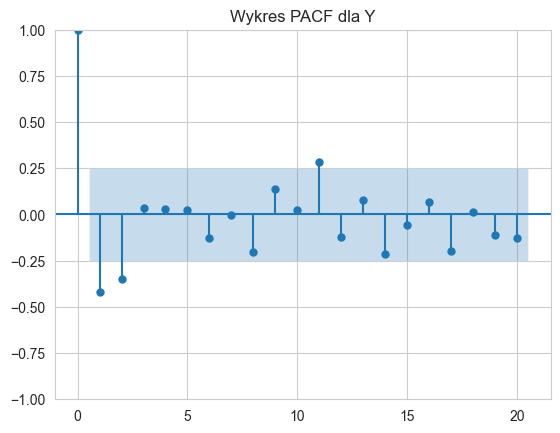

In [47]:
plt.plot(Y)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(Y, lags=30)
plt.title('Wykres ACF dla Y')
plt.show()

plot_pacf(Y, lags=20, method='ywmle')
plt.title('Wykres PACF dla Y')
plt.show()

### The model is trained on the raw, non-stationary data, as the specified differencing parameter `d` accounts for non-stationarity during model fitting. The parameter d indicates how many times the data is differenced to remove trends, while `p` and `q` control the autoregressive and moving average components, respectively.

In [48]:
data = pd.Series(X.to_numpy())

model_arma = ARIMA(data, order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -143.354
Date:                Sat, 21 Jun 2025   AIC                            296.708
Time:                        00:13:44   BIC                            307.180
Sample:                             0   HQIC                           300.804
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5016      0.484     -1.037      0.300      -1.450       0.447
ar.L2         -0.4878      0.228     -2.137      0.033      -0.935      -0.040
ma.L1         -0.1588      0.500     -0.317      0.7

In [49]:
plt.show()
data = pd.Series(X.to_numpy())

model_arma = ARIMA(data, order=(2, 1, 0))  # ARIMA(p=2, d=1, q=0)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -143.525
Date:                Sat, 21 Jun 2025   AIC                            293.051
Time:                        00:13:44   BIC                            299.334
Sample:                             0   HQIC                           295.508
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6612      0.148     -4.474      0.000      -0.951      -0.371
ar.L2         -0.4332      0.126     -3.448      0.001      -0.679      -0.187
sigma2         6.9267      1.277      5.424      0.0

In [50]:
forecast_object = model_arma_fit.get_forecast(steps=3)
forecast = forecast_object.predicted_mean
print(forecast)

conf_int = forecast_object.conf_int()
print(conf_int)

61    21.089376
62    20.437682
63    18.880446
Name: predicted_mean, dtype: float64
      lower y    upper y
61  15.931029  26.247722
62  14.991246  25.884118
63  13.154192  24.606700
